In [ ]:
!pip install python-igraph
!pip install matplotlib
!pip install numpy
!pip install scipy
!pip install easygui
!pip install cairocffi

In [3]:
# Import of required libraries and packages
import igraph as ig
import easygui
from matplotlib import pyplot as plt
import numpy as np
import scipy
import statistics
import pandas as pd
print(ig.__version__)

#Creating and empty Graph object
graph = ig.Graph()

0.9.1


In [4]:
# Load the data and create a network
# Data is in Pajek-format
scim = ig.read('hb_scim.net',format='pajek')
scim.summary()

'IGRAPH UNW- 5144 472520 -- \n+ attr: id (v), name (v), weight (e)'

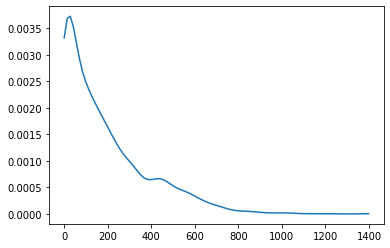

In [5]:
# More advanced plot of the degree distribtion by using the probability density
from scipy.stats.kde import gaussian_kde
from numpy import linspace

degree = scim.degree() 

# Estimation of the probability denstity function using a kernel-density estimation using Gaussian kernel 
kde = gaussian_kde(degree)
# these are the values over wich your kernel will be evaluated
dist_space = linspace( min(degree), max(degree), 100 )
# plot the results
plt.plot( dist_space, kde(dist_space) )

In [11]:
cc= scim.clusters(mode='WEAK')
print("number of connected components " + str(len(cc)))
cc = np.array(sorted(cc, key=len, reverse=True), dtype="object")
print("largest component is " + str(len(cc[0])) + " nodes big")
print("second largest component is " + str(len(cc[1])) + " nodes big")
scim_comp = scim.subgraph(cc[0])

number of connected components 542
largest component is 4599 nodes big
second largest component is 2 nodes big


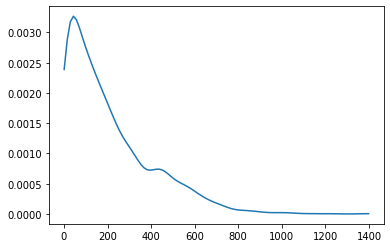

In [12]:
# More advanced plot of the degree distribtion by using the probability density
from scipy.stats.kde import gaussian_kde
from numpy import linspace

degree = scim_comp.degree() 

# Estimation of the probability denstity function using a kernel-density estimation using Gaussian kernel 
kde = gaussian_kde(degree)
# these are the values over wich your kernel will be evaluated
dist_space = linspace( min(degree), max(degree), 100 )
# plot the results
plt.plot( dist_space, kde(dist_space) )

In [26]:
uts = scim_comp.vs.get_attribute_values("name")
colnames=['UT', 'Title', 'Journal', 'PubYear','Volume','Issue','DocType','TimesCited'] 
pubs = pd.read_csv("Publications_Wos.txt",delimiter='\t', index_col=False, names=colnames, header=None).set_index('UT')

In [27]:
pubs

,Title,Journal,PubYear,Volume,Issue,DocType,TimesCited
UT,,,,,,,
000071723600001,"Comments on Belver C. Griffith, recipient of t...",SCIENTOMETRICS,1997,40,3,359,Biographical-Item
000071723600002,"Comments on John Irvine and Ben R. Martin, rec...",SCIENTOMETRICS,1997,40,3,363,Editorial Material
000071723600003,From the opening address of the conference,SCIENTOMETRICS,1997,40,3,367,Editorial Material
000071723600004,Ambiguity in measurement,SCIENTOMETRICS,1997,40,3,369,Article; Proceedings Paper
000071723600005,Cross-national comparison of Frontier areas of...,SCIENTOMETRICS,1997,40,3,385,Article; Proceedings Paper
...,...,...,...,...,...,...,...
A1997YH07800003,View from afar: 'visible' productivity of scie...,SCIENTOMETRICS,1997,40,2,215,Article
A1997YH07800004,Mapping the social and behavioral sciences wor...,SCIENTOMETRICS,1997,40,2,237,Article
A1997YH07800005,International publication patterns in social s...,SCIENTOMETRICS,1997,40,2,277,Article
